In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

 
# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('../../data_samples/Social_Network_Ads.csv')

print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [2]:
df.head()
# df.info()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])
 
# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data, dtype="int")
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [4]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
attr_data = data[predictions]
label_data = data['Purchased'] 


print(attr_data)

     Age  EstimatedSalary  Gender_Female  Gender_Male
0     19            19000              0            1
1     35            20000              0            1
2     26            43000              1            0
3     27            57000              1            0
4     19            76000              0            1
..   ...              ...            ...          ...
395   46            41000              1            0
396   51            23000              0            1
397   50            20000              1            0
398   36            33000              0            1
399   49            36000              1            0

[400 rows x 4 columns]


In [5]:
# lakukan normalisasi terhadap data yang kita miliki
scaler = StandardScaler()

scaler.fit(attr_data)
scaled_data = scaler.transform(attr_data)
scaled_data = pd.DataFrame(scaled_data, columns= attr_data.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [6]:
# bagi data menjadi train dan test untuk setiap atribut dan label
attr_train, attr_test, label_train, label_test = train_test_split(scaled_data, label_data, test_size=0.2, random_state=0)

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()

model.fit(attr_train, label_train)

# uji akurasi model
model_score = model.score(attr_test, label_test)
# print(model_score)

# prediksi data label
label_pred = model.predict(attr_test)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(attr_test, label_test)))

confusion_matrix1 = confusion_matrix(label_test, label_pred)
print(confusion_matrix1)

print(classification_report(label_test, label_pred))

# # The coefficients
# print("Coefficients: \n", model.coef_)

# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(label_test, label_pred))

# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(label_test, label_pred))

Accuracy of logistic regression classifier on test set: 0.91
[[56  2]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [7]:

model2 = linear_model.LogisticRegression()

attr_sample_test = np.array(list([item] for item in attr_test['EstimatedSalary']))
attr_sample_train = np.array(list([item] for item in attr_train['EstimatedSalary']))

model2.fit(attr_sample_train, label_train)

model2_score = model2.score(attr_sample_test, label_test)

# print(attr_test['EstimatedSalary'])
print(model2_score)
# print(attr_sample_test)

label_sample_pred = model2.predict(attr_sample_test)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model2.score(attr_sample_test, label_test)))


# # Plot outputs
# plt.scatter(attr_sample_test, label_test, color="black")
# plt.plot(attr_sample_test, label_sample_pred, color="blue", linewidth=3)

# # plt.xticks(())
# # plt.yticks(())

# plt.show()

0.825
Accuracy of logistic regression classifier on test set: 0.82


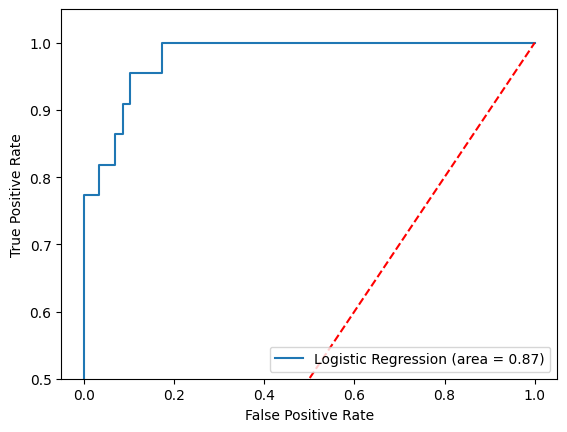

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(label_test, model.predict(attr_test))
fpr, tpr, thresholds = roc_curve(label_test, model.predict_proba(attr_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [9]:
confusion_matrix2 = confusion_matrix(label_test, label_sample_pred)
print(confusion_matrix2)

print(classification_report(label_test, label_sample_pred))

[[56  2]
 [12 10]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



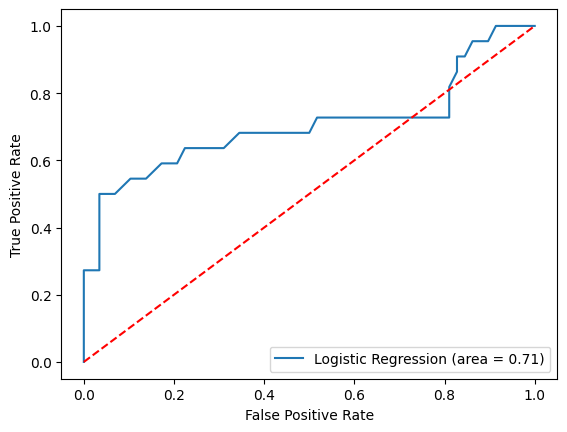

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(label_test, model2.predict(attr_sample_test))
fpr, tpr, thresholds = roc_curve(label_test, model2.predict_proba(attr_sample_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()